## 通し課題　DAY2
### kaggle: kickstarter

データ : ks-projects-201801  
問題 : 目的変数をstateとする分類  
参考 : https://www.kaggle.com/kemical/kickstarter-projects

-----------------------------------
### ■ データの読み込み
-----------------------------------

In [2]:
# 各種ライブラリーインポート
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
# データ読み込み
data = pd.read_csv('../../../data/kickstarter/ks-projects-201801.csv')
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [15]:
# データ分割
X = data.drop(['state'],axis=1)
y = data['state']
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=9999)
print(train_X.shape[0] + test_X.shape[0])
print(X.shape[0])

378661
378661


In [14]:
print(train_X)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


In [11]:
# データの情報
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331675 entries, 0 to 331674
Data columns (total 47 columns):
ID                  331675 non-null int64
name                331672 non-null object
category            331675 non-null object
main_category       331675 non-null object
currency            331675 non-null object
deadline            331675 non-null object
goal                331675 non-null float64
launched            331675 non-null object
pledged             331675 non-null float64
state               331675 non-null float64
backers             331675 non-null int64
country             331675 non-null object
usd pledged         331465 non-null float64
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
Art                 331675 non-null float64
Comics              331675 non-null float64
Crafts              331675 non-null float64
Dance               331675 non-null float64
Design              331675 non-null float64
Fashion             

In [12]:
# カラムリスト取得
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Art', 'Comics',
       'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games',
       'Journalism', 'Music', 'Photography', 'Publishing', 'Technology',
       'Theater', 'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY',
       'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD', 'goal_stdsc', 'period',
       'period_sdsc'],
      dtype='object')

In [13]:
# 削除するカラムリスト作成
drop_colums_no_normalization = [
        'ID', 'name', 'category', 'main_category', 'currency', 'deadline',
#         'goal', 
        'launched', 'pledged', 
#         'state', 
        'backers', 'country',
        'usd pledged', 'usd_pledged_real', 'usd_goal_real', 
#         'Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games',
#         'Journalism', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater', 
#         'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY','MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD', 
        'goal_stdsc', 
#         'period',
        'period_sdsc'
     ]

In [14]:
# 標準化しない場合のデータ
data1 = df.drop(columns=drop_colums_no_normalization) # 入力データ
data1.head()

,goal,state,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,...,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,period
0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
1,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0
2,45000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0
3,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0
4,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0


In [15]:
# 統計情報の確認
data1[['goal','period']].describe()

,goal,period
count,3.316750e+05,331675.000000
mean,4.425157e+04,33.954875
std,1.117917e+06,12.713332
min,1.000000e-02,1.000000
25%,2.000000e+03,30.000000
50%,5.000000e+03,30.000000
75%,1.500000e+04,36.000000
max,1.000000e+08,92.000000


In [16]:
drop_colums_normalization = [
        'ID', 'name', 'category', 'main_category', 'currency', 'deadline',
        'goal', 'launched', 'pledged', 
#         'state', 
        'backers', 'country',
        'usd pledged', 'usd_pledged_real', 'usd_goal_real', 
#         'Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games',
#         'Journalism', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater', 
#         'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY','MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD', 
#         'goal_stdsc', 
        'period',
#         'period_sdsc'
     ]

In [17]:
# 標準化した場合のデータ
data2 = df.drop(columns=drop_colums_normalization)
data2.head()

,state,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,...,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,goal_stdsc,period_sdsc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.988637,1.969992
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.011062,2.048650
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.249451,0.868784
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.042385,-0.311081
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.903868,0.868784


In [18]:
# 統計情報の確認
# 標準化しているので　mean ≒ 0.0 , std ≒ 1.0 となっていることを確認する
data2[['goal_stdsc','period_sdsc']].describe()

,goal_stdsc,period_sdsc
count,3.316750e+05,3.316750e+05
mean,-8.250245e-14,1.014309e-13
std,1.000002e+00,1.000002e+00
min,-7.757544e+00,-2.592155e+00
25%,-5.811083e-01,-3.110813e-01
50%,-4.238451e-02,-3.110813e-01
75%,6.035333e-01,1.608649e-01
max,5.780269e+00,4.565696e+00


--------------------------------------------
### ■ クロスバリデーション法
--------------------------------------------

In [19]:
# ライブラリインポート
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.svm import LinearSVC # Support Vector Machine
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
import pickle

In [20]:
# 目的変数、説明変数に分ける
# 標準化していないデータ
y1 = data1['state'].values
X1 = data1.drop(['state'],axis=1).values
print('y1 - type:{}'.format(type(y1)))
print('X1 - type:{}'.format(type(X1)))

# 標準化したデータ
y2 = data2['state'].values
X2 = data2.drop(['state'],axis=1).values
print('y2 - type:{}'.format(type(y2)))
print('X2 - type:{}'.format(type(X2)))

y1 - type:<class 'numpy.ndarray'>
X1 - type:<class 'numpy.ndarray'>
y2 - type:<class 'numpy.ndarray'>
X2 - type:<class 'numpy.ndarray'>


---------------------------
#### ①標準化していない場合の分類精度
---------------------------

In [21]:
# KFoldの引数設定
n_split = 5
cross_valid_acc_learn1 = []
cross_valid_acc_test1 = []
split_num = 1

# クロスバリデーション実施
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=9999).split(X1,y1):
    X_train, y_train = X1[train_idx], y1[train_idx] # 学習データ
    X_test, y_test = X1[test_idx], y1[test_idx] # テストデータ
    
    # 表示用
    print('{}Fold'.format(split_num))
    
    # ロジスティック回帰モデルで学習&予測
    clf = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=500)
    clf.fit(X_train,y_train) # 学習

    # 訓練データに対する分類精度
    y_est_learn = clf.predict(X_train)
    acc_learn = accuracy_score(y_train, y_est_learn)
    cross_valid_acc_learn1.append(acc_learn)

    # テストデータに対する分類精度
    y_est_test = clf.predict(X_test)
    acc_test = accuracy_score(y_test, y_est_test)
    cross_valid_acc_test1.append(acc_test)
    print('  finished')
    
    split_num += 1

# numpy配列に変換
acc_learn = np.array(cross_valid_acc_learn1)
acc_test = np.array(cross_valid_acc_test1)

print('----------------------------')
print('■ 分類精度')
print('----------------------------')
print('訓練データに対する分類精度：{:.2f}'.format(acc_learn.mean()*100))
print('テストデータに対する分類精度：{:.2f}'.format(acc_test.mean()*100))

1Fold
  finished
2Fold
  finished
3Fold
  finished
4Fold
  finished
5Fold
  finished
----------------------------
■ 分類精度
----------------------------
訓練データに対する分類精度：60.38
テストデータに対する分類精度：60.30


---------------------------
#### ②標準化した場合の分類精度
---------------------------

In [30]:
# KFoldの引数設定
n_split = 5
cross_valid_acc_learn2 = []
cross_valid_acc_test2 = []
split_num = 1

# クロスバリデーション実施
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=9999).split(X2,y2):
    X_train, y_train = X2[train_idx], y2[train_idx] # 学習データ
    X_test, y_test = X2[test_idx], y2[test_idx] # テストデータ
    
    # 表示用
    print('{}Fold'.format(split_num))
    
    # ロジスティック回帰モデルで学習&予測
    clf = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=500)
    clf.fit(X_train,y_train) # 学習

    # 訓練データに対する分類精度
    y_est_learn = clf.predict(X_train)
    acc_learn = accuracy_score(y_train, y_est_learn)
    cross_valid_acc_learn2.append(acc_learn)

    # テストデータに対する分類精度
    y_est_test = clf.predict(X_test)
    acc_test = accuracy_score(y_test, y_est_test)
    cross_valid_acc_test2.append(acc_test)
    print('  finished')
    
    split_num += 1

# numpy配列に変換
acc_learn = np.array(cross_valid_acc_learn2)
acc_test = np.array(cross_valid_acc_test2)

print('----------------------------')
print('■ 分類精度')
print('----------------------------')
print('訓練データに対する分類精度：{:.2f}'.format(acc_learn.mean()*100))
print('テストデータに対する分類精度：{:.2f}'.format(acc_test.mean()*100))

1Fold
  finished
2Fold
  finished
3Fold
  finished
4Fold
  finished
5Fold
  finished
----------------------------
■ 分類精度
----------------------------
訓練データに対する分類精度：64.88
テストデータに対する分類精度：64.85


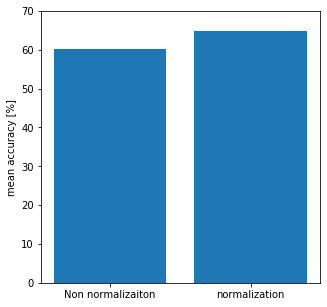

In [23]:
# 標準化しない/するの比較
x=['Non normalizaiton', 'normalization']
y=[np.mean(cross_valid_acc_test1)*100,np.mean(cross_valid_acc_test2)*100]
# 描画
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.bar(x,y)
ax.set_ylabel('mean accuracy [%]')
ax.set_ylim([0,70])
plt.show()

標準化によって**約4.5%程**精度が向上したことを確認

-------------------------------------------------------------------------------

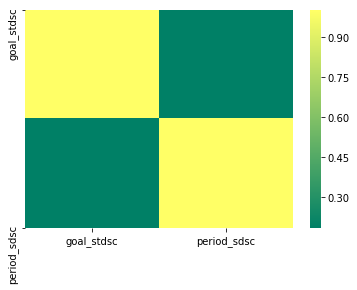

In [24]:
# 相関があるか確認
sns.heatmap(data2[['goal_stdsc','period_sdsc']].corr(),cmap='summer')

------------------------
### ■ グリッドサーチ
------------------------

In [33]:
from sklearn.model_selection import GridSearchCV
import time

#### Gridsearchについて
1. データをテストデータと学習用データに分割
2. 学習用データでグリッドサーチして、ハイパーパラメータを探索
3. 最適なパラメータでテストデータの予測
4. 1~4を繰り返し行い予測精度の平均を算出

In [36]:
# crossvalid & gridsearch
def crossvalid_and_gridsearch(n_split, X, y, estimator, params, cv):
    """
        クロスバリデーションを行う関数(Gridsearchによるハイパーパラメータ探索)
        【前提】分類問題(accuracy_scoreでの評価)
        n_split     : データの分割数
        X           : 説明変数の行列
        y           : 目的変数のベクトル
        estimator   : 学習モデル(exp. LogisticRegression())
        params      : グリッドサーチの探索パラメータ
        cv          : グリッドサーチの分割数
        返り値:　平均分類精度(float)
    """
    split_num = 1
    acc_score = 0
    start = time.time()
    # クロスバリデーション実施
    for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=9999).split(X,y):
        X_train, y_train = X[train_idx], y[train_idx] # 学習データ
        X_test, y_test = X[test_idx], y[test_idx] # テストデータ
        
        # nFold目を表示
        print('{}Fold'.format(split_num))
        start = time.time()

        # グリッドサーチによるパラメータ探索
        clf = GridSearchCV(estimator=estimator, param_grid=params, cv=cv,scoring="accuracy", n_jobs=-1)
        clf.fit(X_train, y_train)

        # テストデータの予測
        y_est = clf.predict(X_train)
        
        # テストデータに対する分類精度算出
        acc_score += clf.score(X_test, y_test)
        print('  finished : {}sec'.format(time.time() - start))
        split_num += 1
    
    return acc_score/n_split

In [39]:
# LogisticRegression(l2)のグリッドサーチによる交差検証
clf_l2 = LogisticRegression(penalty='l2', solver='lbfgs',random_state=9999, max_iter=300)

# 探索パラメータセット
params = {'C': [1, 5, 10, 50]}

# 交差検証
acc_ave_score =  crossvalid_and_gridsearch(3, X2, y2, clf_l2, params, 3)
print('-------------------------------')
print("LogisticRegression-L2: {:.4f}%".format(acc_ave_score*100))

1Fold
  finished : 21.18604564666748sec
2Fold
  finished : 21.242637395858765sec
3Fold
  finished : 21.047367811203003sec
-------------------------------
LogisticRegression-L2: 64.8590%


In [40]:
# LogisticRegression(l1)のグリッドサーチによる交差検証
clf_l1 = LogisticRegression(penalty='l1', solver='liblinear',random_state=9999, max_iter=300)

# 探索パラメータセット
params = {'C': [1, 5, 10, 50]}

# 交差検証
acc_ave_score =  crossvalid_and_gridsearch(3, X2, y2, clf_l1, params, 3)
print('------------------------------')
print("LogisticRegression-L1: {:.4f}%".format(acc_ave_score*100))

1Fold
  finished : 24.97976589202881sec
2Fold
  finished : 22.25857639312744sec
3Fold
  finished : 45.471617698669434sec
------------------------------
LogisticRegression-L1: 64.8587%


グリッドサーチの結果
- 精度向上があまり見られない
- l2の精度 > l1の精度

-------------------------------------------------
### ■ モデルを変更してみる
-------------------------------------------------

In [26]:
# サポートベクターマシンを選択
from sklearn.svm import LinearSVC # 線形カーネル用
from sklearn.svm import SVC # rbf(カーネル関数用)
from sklearn.model_selection import train_test_split # ホールドアウト

svm.SVC, svm.LinearSVCは非常に時間かかるor終わらないので以下svm.SVCのリファレンスよりSGDClassifierなどで代用

- svm.SVC
    - [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
        - SVCは大規模データ（数万以上）の場合は向かないようなので、SGDClassifier or Nystroemで変換したほうが良い
- SGDClassifier
    - [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
        - loss='hinge' でLinearSVM
- Nystroem
    - [Nystroem](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html#sklearn.kernel_approximation.Nystroem)

In [47]:
# LinearSVM
# SGDClassifierのインポート
from sklearn.linear_model import SGDClassifier

# インスタンス生成
clf_sgd = SGDClassifier(loss='hinge',fit_intercept=True, random_state=9999)

# 探索パラメータセット
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]}

# 交差検証
acc_ave_score =  crossvalid_and_gridsearch(3, X2, y2, clf_sgd, params, 3)
print('-------------------------------')
print("LinearSVM-sgd: {:.4f}%".format(acc_ave_score*100))

1Fold
  finished : 4.967127084732056sec
2Fold
  finished : 4.418630123138428sec
3Fold
  finished : 4.863940238952637sec
-------------------------------
LinearSVM-sgd: 63.8592%


In [73]:
# カーネル近似を入力する場合
from sklearn.kernel_approximation import RBFSampler
import math

In [81]:
# インスタンス生成
clf_svc_sgd = SGDClassifier(loss='hinge',random_state=9999)

acc_list = []

# RBFSamplerのハイパーパラメータを変更しながら交差検証
for i in np.arange(1,11):
    # gamma設定(0.1 ~ 1.0)
    gamma = i/10
    print('----------------------')
    print('■ gamma:', gamma)
    # カーネル近似
    rbf_feature = RBFSampler(gamma=gamma, n_components=100, random_state=9999)

    # 変換後データ
    X2_transformed = rbf_feature.fit_transform(X2)

    # 探索パラメータセット
    params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]}

    # 交差検証
    acc_ave_score =  crossvalid_and_gridsearch(3, X2_transformed, y2, clf_svc_sgd, params, 3)
    acc_list.append(acc_ave_score)

----------------------
■ gamma: 0.1
1Fold
  finished : 10.277015686035156sec
2Fold
  finished : 9.516015768051147sec
3Fold
  finished : 9.095277547836304sec
----------------------
■ gamma: 0.2
1Fold
  finished : 9.106316328048706sec
2Fold
  finished : 9.017570495605469sec
3Fold
  finished : 9.44701600074768sec
----------------------
■ gamma: 0.3
1Fold
  finished : 9.26489543914795sec
2Fold
  finished : 8.773394346237183sec
3Fold
  finished : 8.967199325561523sec
----------------------
■ gamma: 0.4
1Fold
  finished : 9.375393152236938sec
2Fold
  finished : 9.593355178833008sec
3Fold
  finished : 9.08039665222168sec
----------------------
■ gamma: 0.5
1Fold
  finished : 9.118425607681274sec
2Fold
  finished : 8.56938624382019sec
3Fold
  finished : 8.715978622436523sec
----------------------
■ gamma: 0.6
1Fold
  finished : 8.90624737739563sec
2Fold
  finished : 8.949045896530151sec
3Fold
  finished : 9.257891654968262sec
----------------------
■ gamma: 0.7
1Fold
  finished : 9.10528278350

In [93]:
# gammaを変えた時の最も良い精度
acc = np.array(acc_list)
print('RBFkernelSVM-sgd:{:.4f}%'.format(np.max(acc)*100))

RBFkernelSVM-sgd:64.6428%


- svmモジュールのsvcは非常に時間がかかる
- 時間を減らす方法としては、特徴量を減らす　⇒　グラム行列のサイズが小さくなる
    - otherでまとめる
    - 学習データの量を減らす

-----------------------------------------------------
#### 特徴を減らしての学習を検証
-----------------------------------------------------

In [95]:
# othersでまとめたDataframeのダンプ読み込み
df_droped = pd.read_pickle('./kickstarter_day1_df_after_preproccessed_dropcolumn.pkl')

In [96]:
# 先頭5行表示
df_droped.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,Theater_2,category_others_2,AUD_2,CAD_2,DKK_2,EUR_2,HKD_2,JPY_2,NZD_2,currency_others_2
0,1000002330,The Songs of Adelaide & Abullah,Poetry,category_others,currency_others,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,category_others,currency_others,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1000004038,Where is Hank?,Narrative Film,category_others,currency_others,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,currency_others,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,currency_others,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
# カラム名表示
df_droped.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Art', 'Comics',
       'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games',
       'Journalism', 'Music', 'Photography', 'Publishing', 'Technology',
       'Theater', 'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY',
       'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD', 'goal_stdsc', 'period',
       'period_sdsc', 'Comics_2', 'Crafts_2', 'Dance_2', 'Fashion_2', 'Food_2',
       'Journalism_2', 'Music_2', 'Photography_2', 'Technology_2', 'Theater_2',
       'category_others_2', 'AUD_2', 'CAD_2', 'DKK_2', 'EUR_2', 'HKD_2',
       'JPY_2', 'NZD_2', 'currency_others_2'],
      dtype='object')

In [98]:
# 不要なカラム削除
# othersを削除する理由：One-hot-encodingにおいて、n個目の特徴はn-1で表現できるから。
drop_columns_2 = ['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 
#         'state', 
        'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Art',
       'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography',
       'Publishing', 'Technology', 'Theater', 'AUD', 'CAD', 'CHF', 'DKK',
       'EUR', 'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK', 'SGD',
       'USD', 
#         'goal_stdsc', 'period_sdsc', 'Comics_2', 'Crafts_2',
#        'Dance_2', 'Fashion_2', 'Food_2', 'Journalism_2', 'Music_2',
#        'Photography_2', 'Technology_2', 'Theater_2', 
        'category_others_2',
#        'AUD_2', 'CAD_2', 'DKK_2', 'EUR_2', 'HKD_2', 'JPY_2', 'NZD_2',
        'currency_others_2'
                 ]
# 新しい入力データ
data2 = df_droped.drop(columns=drop_columns_2,axis=1)

In [99]:
#先頭5行
data2.head(5)

,state,goal_stdsc,period,period_sdsc,Comics_2,Crafts_2,Dance_2,Fashion_2,Food_2,Journalism_2,...,Photography_2,Technology_2,Theater_2,AUD_2,CAD_2,DKK_2,EUR_2,HKD_2,JPY_2,NZD_2
0,0.0,-0.988637,59.0,1.969992,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.011062,60.0,2.048650,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.249451,45.0,0.868784,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-0.042385,30.0,-0.311081,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.903868,45.0,0.868784,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.svm import SVC # rbf(カーネル関数用)
from sklearn.model_selection import train_test_split

In [29]:
# インスタンス生成
svc = SVC(kernel='rbf', random_state=9999)

# データ作成
y = data2['state'].values
X = data2.drop(['state'],axis=1).values

# 一旦ホールドアウトで検証
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=9999)

# 学習
svc.fit(train_X, train_y)
y_est = svc.predict(test_X)

# 予測精度
print('予測精度: {:.2f}'.format(accuracy_score(test_y, y_est)*100))

予測精度: 65.20


-----------------------------------------------------------------------------
####  SVCは高い精度が出そうではあるが計算時間が長いのでデータを減らしてみる
-----------------------------------------------------------------------------

In [101]:
# データの分割
success = data2[data2['state'] == 1.0]
failed = data2[data2['state'] == 0.0]
# 分割できたかどうか確認
print('元のデータ数:',len(data2))
print('suucess: {0}, failed: {1}'.format(len(success), len(failed)))
print('success + failed :',(len(success) + len(failed)))

元のデータ数: 331675
suucess: 133956, failed: 197719
success + failed : 331675


In [105]:
# 適当に上からn件ずつ取得
n = 5000
data3 = pd.concat([success[:n], failed[:n]], axis=0)
test = pd.concat([success[n+1:], failed[n+1:]])
print('学習データ数:',len(data3))
print('テストデータ数:',len(test))

学習データ数: 10000
テストデータ数: 321673


In [107]:
# SVCで学習してみる
from sklearn.svm import SVC # rbf(カーネル関数用)
from sklearn.model_selection import train_test_split

# インスタンス生成
svc = SVC(kernel='rbf', random_state=9999)

# データ作成
train_y = data3['state'].values
train_X = data3.drop(['state'],axis=1).values

# テスト用
test_y = test['state'].values
test_X = test.drop(['state'], axis=1).values

# 学習
# 時間測定 start
start = time.time()
svc.fit(train_X, train_y)
y_est = svc.predict(test_X)
print('learning time: {}sec'.format(time.time() - start))

# 予測精度
print('予測精度: {:.2f}'.format(accuracy_score(test_y, y_est)*100))

learning time: 98.97466087341309sec
予測精度: 62.66


- SVCは時間がかかるためハイパーパラメータの調整は割愛